In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_ANDREA = False
if _ANDREA:
    BASE_FOLDER = Path("C:/Users/resca/OneDrive - Politecnico di Milano/_Dottorato/6 - Tesisti/2021_2022_Tasso/_Data")
else:
    BASE_FOLDER = Path("E:\My Drive\_Papers\_2023_Chemosensors\_Data\Trial_002")

In [3]:
compounds = ['BUT', 'CH4', 'CO2']
concentrations = ['75', '131', '130', '303']
sensor_labels = ['S-1', 'S-2', 'S-3','S-4', 'S-5', 'S-6', 'S-7', 'S-8']

In [4]:
for compound in compounds:
    for conc in concentrations:
        folder = BASE_FOLDER / f'{compound}_{conc}ppm'
        if folder.exists():
            print(f'{compound}-{conc}')
            for csv_file in folder.iterdir():
                if csv_file.is_file() and 'csv' in csv_file.name:
                    # Get temperature modulation from file name
                    temperature_m = csv_file.name.split('_')[-1][:-4]
                    tmp_data = pd.read_csv(csv_file, header=6)
                    tmp_data['Seconds'] = [x*0.1 for x in range(len(tmp_data))]

                    temp_options = tmp_data["Temperature Modulation"].unique()
                    if len(temp_options) == 1:
                        temperature_m_value = temp_options[0]
                    else:
                        temperature_m_value = temp_options[1]

                    fig, ax = plt.subplots(1, 2, figsize=(18,6))
                    for sensor_label in sensor_labels:
                        ax[0].plot(tmp_data['Seconds'], tmp_data[sensor_label], label=sensor_label)
                    if len(tmp_data["Temperature Modulation"].unique()) > 1:
                        temp_mod_title = tmp_data["Temperature Modulation"].unique()[1]
                    else:
                        temp_mod_title = tmp_data["Temperature Modulation"].unique()[0]
                    ax[0].set_title(f'{compound}-{conc} ppm-{temp_mod_title}')
                    ax[0].set_xlabel('Seconds')
                    ax[0].set_ylabel('Voltage (V)')
                    ax[0].set_ylim([0,5])
                    ax[0].legend()

                    ax2 = ax[1].twinx()
                    lns1 = ax[1].plot(tmp_data['Seconds'], tmp_data['Temperature'], label='Temperature')
                    ax[1].set_ylabel('Temperature [$^\circ$C]')
                    #secax_y = plt.secondary_yaxis('left')
                    lns2 = ax2.plot(tmp_data['Seconds'], tmp_data['Humidity'], c='orange', label='Humidity')
                    ax2.set_ylabel('Humidity [%]')
                    ax[1].set_xlabel('Seconds')
                    lns = lns1 + lns2
                    labs = [l.get_label() for l in lns]
                    ax[1].legend(lns, labs, loc=0)

                    fig.savefig(Path('_figures') / f'{compound}-{conc}-{temperature_m_value}.png')
                    plt.close()

BUT-75
BUT-130
BUT-303
CH4-75
CH4-130
CH4-303
CO2-75
CO2-130
CO2-303


In [9]:
folder = BASE_FOLDER / "BUT_75ppm"
if folder.exists():
    csv_file = folder / "20230705_105554_tr75.csv"
    df = pd.read_csv(csv_file, header=6)

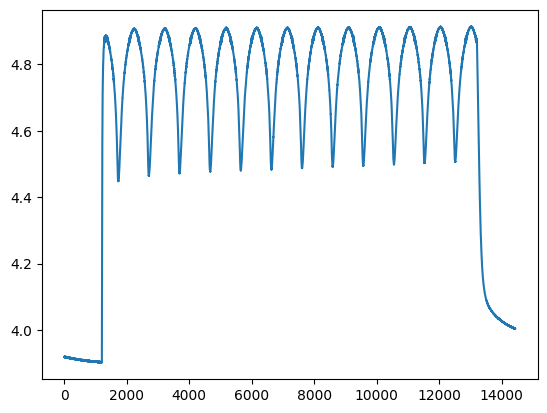

In [11]:
plt.plot(df["S-1"])